Kenapa saya menggunakan Clustering (Kmeans)?

Clustering adalah teknik pembelajaran tanpa pengawasan (unsupervised learning) yang digunakan untuk mengelompokkan data berdasarkan kesamaan atau kedekatan karakteristik. Karena saya ingin Mengidentifikasi pola atau kelompok gempa berdasarkan lokasi geografis (latitude dan longitude). Membagi data menjadi beberapa kelompok untuk memahami area yang sering mengalami gempa.

Saya memilih Kmeans karena K-Means mudah diimplementasikan dan sangat efisien untuk dataset berukuran sedang hingga besar seperti data gempa yang saya punya dan Sederhana, efisien, dan cocok untuk data numerik.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/katalog_gempa.csv")

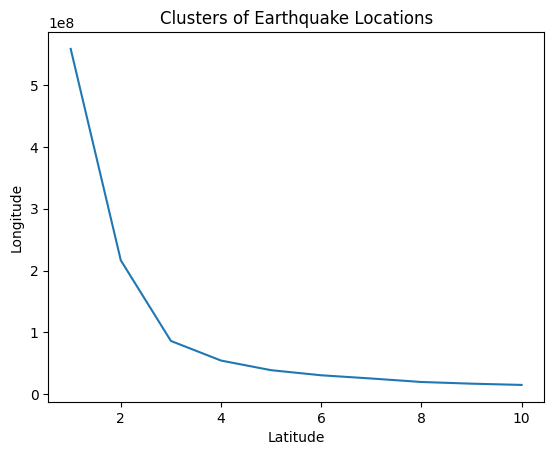

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Clusters of Earthquake Locations') #Gugusan Lokasi Gempa
plt.xlabel('Latitude') #Lintang
plt.ylabel('Longitude') #Garis bujur
plt.show()

Grafik ini berfokus pada lokasi-lokasi gempa bumi dan bagaimana mereka terdistribusi. Label sumbu ini kurang tepat, seharusnya mewakili Jumlah Cluster (k), karena grafik dibuat untuk menunjukkan bagaimana nilai WCSS berubah terhadap jumlah cluster yang berbeda. Ini menunjukkan nilai bujur, yang mengukur jarak timur atau barat dari garis meridian utama. Penurunan yang tajam menunjukkan konsentrasi lokasi gempa di area tertentu. Ini bisa berarti bahwa gempa bumi lebih umum terjadi di wilayah yang lebih dekat ke garis lintang tertentu.

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

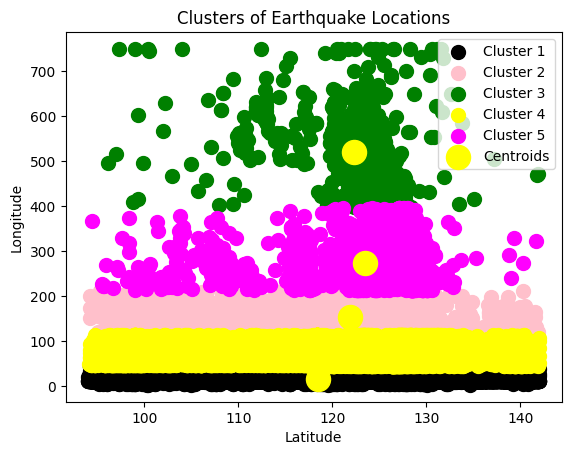

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'black', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'pink', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Earthquake Locations') #Gugusan Lokasi Gempa
plt.xlabel('Latitude') #Lintang
plt.ylabel('Longitude') #Garis bujur
plt.legend()
plt.show()

Data gempa dikelompokkan ke dalam 5 cluster berdasarkan pola distribusi geografis. Setiap cluster memiliki warna berbeda, merepresentasikan lokasi geografis gempa yang mirip. Lokasi gempa dalam cluster tertentu memiliki karakteristik yang lebih mirip satu sama lain dibandingkan dengan cluster lain. Centroids (Titik Tengah Cluster) adalah titik rata-rata dari semua data dalam cluster tersebut, yang digunakan untuk menentukan struktur cluster. Sumbu X pada latitude dari lokasi gempa semakin besar nilai, semakin kearah utara lokasi gempa sedangkan sumbu Y semakin besar nilai, semakin ke arah timur. Dan pola distribusi gempa, pada area yang sering terkena gempa (lebih padat) dan area dengan gempa lebih jarang (lebih tersebar).


In [ ]:
Kmeans1 = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42)
y_kmeans1 = Kmeans1.fit_predict(X)

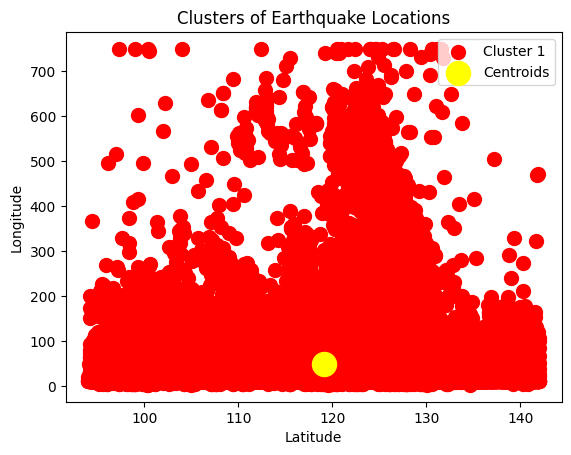

In [ ]:
plt.scatter (X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Kmeans1.cluster_centers_[:, 0], Kmeans1.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Earthquake Locations') #Gugusan Lokasi Gempa
plt.xlabel('Latitude') #Lintang
plt.ylabel('Longitude') #Garis bujur
plt.legend()
plt.show()

Pada titik data (Merah) warna merah menunjukkan bahwa semua gempa dianggap sebagai bagian dari satu kelompok besar. Semua data gempa berada dalam satu kelompok besar (Cluster 1), tanpa segmentasi lebih lanjut. Sedangkan Centroid (Kuning) Titik besar berwarna kuning merupakan centroid (pusat) cluster tunggal. Karena hanya ada satu cluster, centroid ini mewakili semua data gempa.

In [ ]:
print(Kmeans1.cluster_centers_)

[[119.15970674  49.00939852]]


In [ ]:
Kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2 = Kmeans2.fit_predict(X)

In [ ]:
print(Kmeans2.cluster_centers_)

[[118.70902831  25.85245174]
 [122.25006767 207.79961089]]


In [ ]:
Kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans3 = Kmeans3.fit_predict(X)

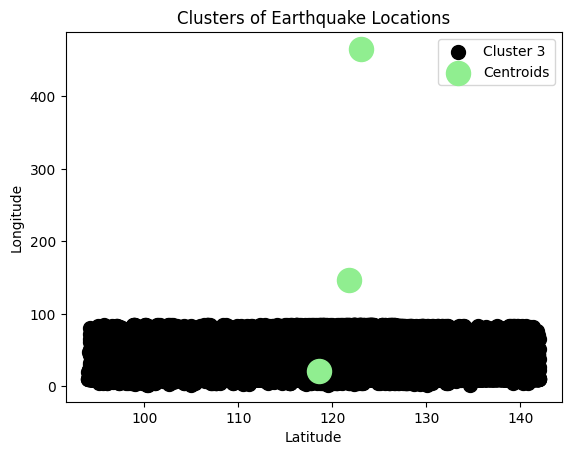

In [ ]:
plt.scatter(X[y_kmeans3 == 0, 0], X[y_kmeans3 == 0, 1], s=100, c='black', label='Cluster 3') # Changed the index from 2 to 1 for the second dimension to select the second column for the y-axis
plt.scatter(Kmeans3.cluster_centers_[:, 0], Kmeans3.cluster_centers_[:, 1], s=300, c='lightgreen', label='Centroids')
plt.title('Clusters of Earthquake Locations') #Gugusan Lokasi Gempa
plt.xlabel('Latitude') #Lintang
plt.ylabel('Longitude') #Garis bujur
plt.legend()
plt.show()

Cluster (Hitam) titik-titik berwarna hitam adalah lokasi gempa yang dikelompokkan menjadi satu clustering yang besar dan Centroids (Hijau Muda) titik terbesar adalah hijau muda. Terlihat ada tiga centroid, yang menunjukkan bahwa data mungkin telah dikelompokkan menjadi lebih dari satu cluster, tetapi hanya Cluster 3 yang divisualisasikan. Data dalam Cluster 3 terlihat sangat padat dan terpusat di sekitar nilai longitude yang lebih rendah, sementara centroid untuk cluster lain berada pada nilai latitude yang lebih tinggi.

In [ ]:
Kmeans4 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans4 = Kmeans4.fit_predict(X)

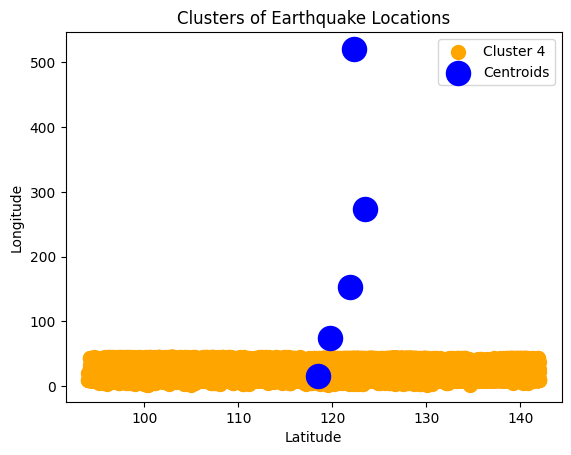

In [ ]:
plt.scatter(X[y_kmeans4 == 0, 0], X[y_kmeans4 == 0, 1], s=100, c='orange', label='Cluster 4') # Changed the index from 2 to 1 for the second dimension to select the second column for the y-axis
plt.scatter(Kmeans4.cluster_centers_[:, 0], Kmeans4.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')
plt.title('Clusters of Earthquake Locations') #Gugusan Lokasi Gempa
plt.xlabel('Latitude') #Lintang
plt.ylabel('Longitude') #Garis bujur
plt.legend()
plt.show()

Titik-titik berwarna oranye mewakili data yang termasuk dalam cluster 4. Titik-titik ini menunjukkan lokasi spesifik gempa bumi yang terklasifikasi dalam cluster tersebut. Dan titik berwarna biru menunjukkan centroid dari cluster yang teridentifikasi. Centroid adalah titik pusat dari cluster dan mewakili lokasi rata-rata dari semua titik dalam cluster tersebut.